# Generate GAA PaletteViz 
## Code to generate 10D GAA PaletteViz plots for EMO-2021

This notebook generates different plots for 10D GAA for EMO-2021 paper.

In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'figure.max_open_warning': 0})
np.random.seed(123456)

### Get appropriate color codings and other markings

In [2]:
sys.path.append('../../')
from vis.plotting.utils import resize_by_tradeoff, color_by_dist, color_by_cv, enhance_color

def load_props(path):
    r"""
    Load CV, Mu, Ik and S from path.
    """
    CV = None
    cvpathf = os.path.join(path, "datacv.csv")
    if os.path.exists(cvpathf):
        CV = np.loadtxt(cvpathf)

    # load the Mu values
    Mu = None
    mupathf = os.path.join(path, "mu.csv")
    if os.path.exists(mupathf):
        Mu = np.loadtxt(mupathf)

    # load the knee indices
    Ik = None
    kpathf = os.path.join(path, "muid.csv")
    if os.path.exists(kpathf):
        Ik = np.loadtxt(kpathf, dtype = int)
        
    return CV, Mu, Ik

def decide_size_color(CV, Mu, Ik):
    r"""
    Decide point-size and color from `CV`, `Mu` and `Ik`
    """
    # decide point-size
    S = 1
    if Mu is not None and Ik is not None:
        S = resize_by_tradeoff(Mu, k=Ik)

    # decide colors
    # C = default_color(F.shape[0], alpha=0.5)
    M = np.mean(F, axis=0)
    C, D = color_by_dist(F, M, 0.15)
    
    # if CV is available, use CV to color
    if CV is not None:
        C = color_by_cv(CV)

    # enhance knee points
    if Ik is not None:
        C = enhance_color(C, Ik)
        
    return S, C, D

### Now do a scatter plot with appropriate colorcodings and markings

../../data/gaa/10d/dataf.csv (3112, 10) ['..', '..', 'data', 'gaa', '10d'] gaa


<IPython.core.display.Javascript object>


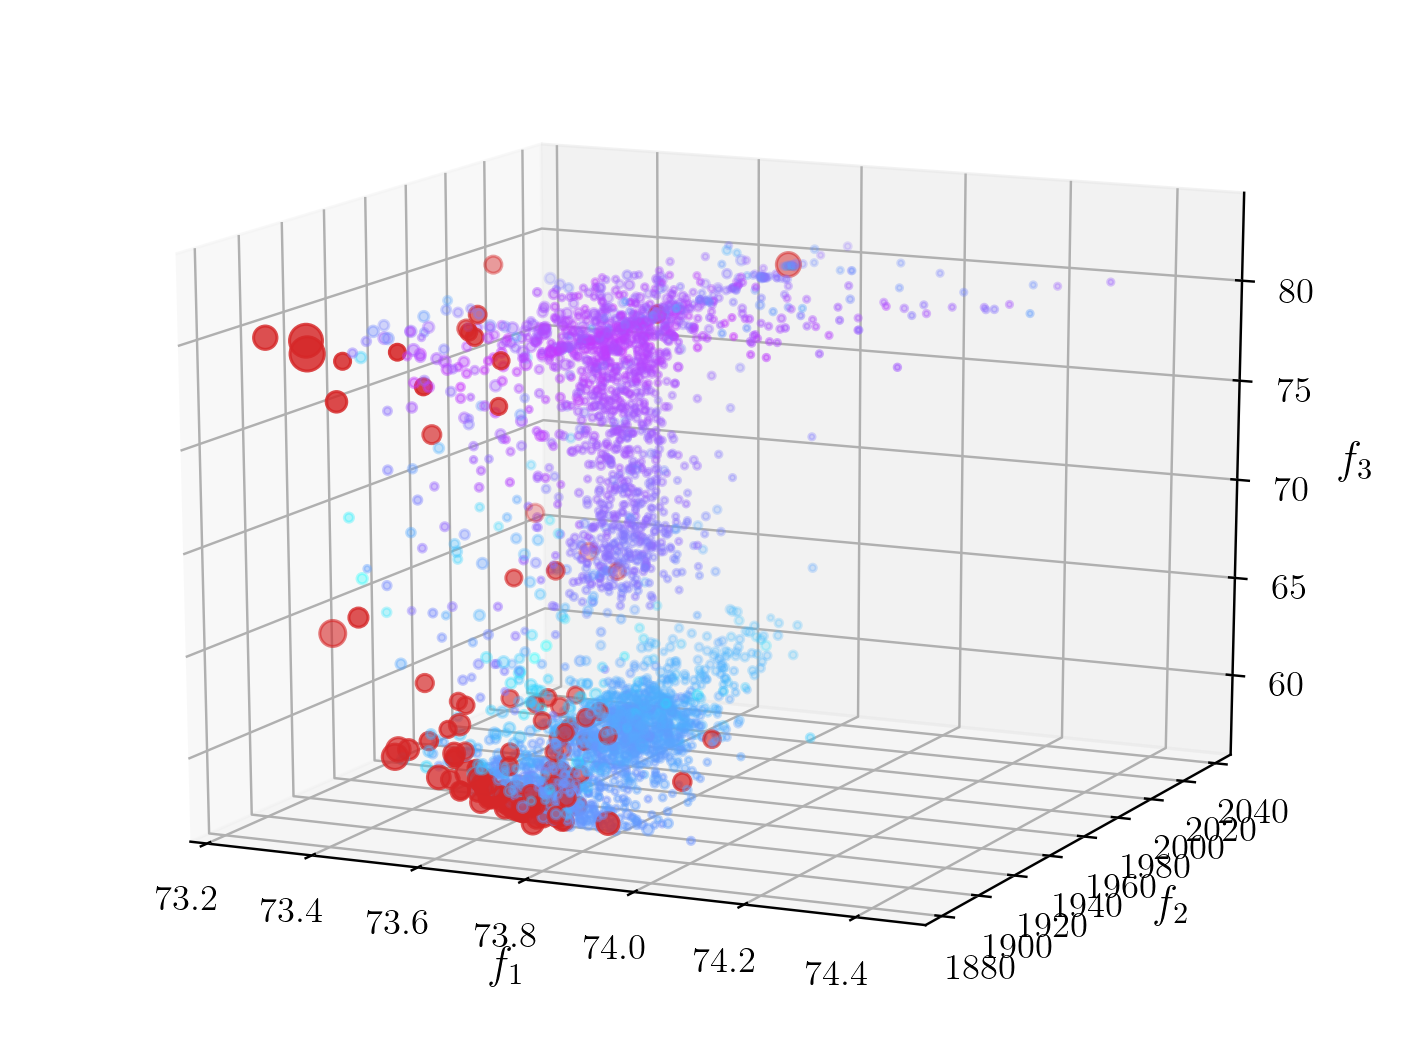

In [3]:
%matplotlib notebook
sys.path.append('../../')
from vis.plotting import scatter
from vis.plotting.scatter import camera_angles

pf,dim = 'gaa', '10d'

fullpathf = "../../data/{0:s}/{1:s}/dataf.csv".format(pf, dim)
if os.path.exists(fullpathf):
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]

    # load the front
    F = np.loadtxt(fullpathf, delimiter=',')
    print(fullpathf, F.shape, dirs, frontname)

    CV, Mu, Ik = load_props(path)
    S,C,_ = decide_size_color(CV, Mu, Ik)

    pdffigpath = os.path.join(path, "scatter3d.pdf")
    svgfigpath = os.path.join(path, "scatter3d.svg")
    with plt.rc_context({"text.usetex": True, "font.size": 12}):
        scatter.plot(F, ax=Axes3D(plt.figure()), s=S, c=C, euler=camera_angles[pf][dim])
        plt.subplots_adjust(top=0.01, bottom=0, right=0.01, left=0, hspace=0, wspace=0)
        plt.margins(0,0,0)
        # save the fig
        plt.savefig(pdffigpath, bbox_inches='tight', pad_inches=0, dpi=150)
        plt.savefig(svgfigpath, bbox_inches='tight', pad_inches=0, dpi=150, format='svg')
        plt.show()

### Do paletteviz original

../../data/gaa/10d/dataf.csv (3112, 10) ['..', '..', 'data', 'gaa', '10d'] gaa


<IPython.core.display.Javascript object>


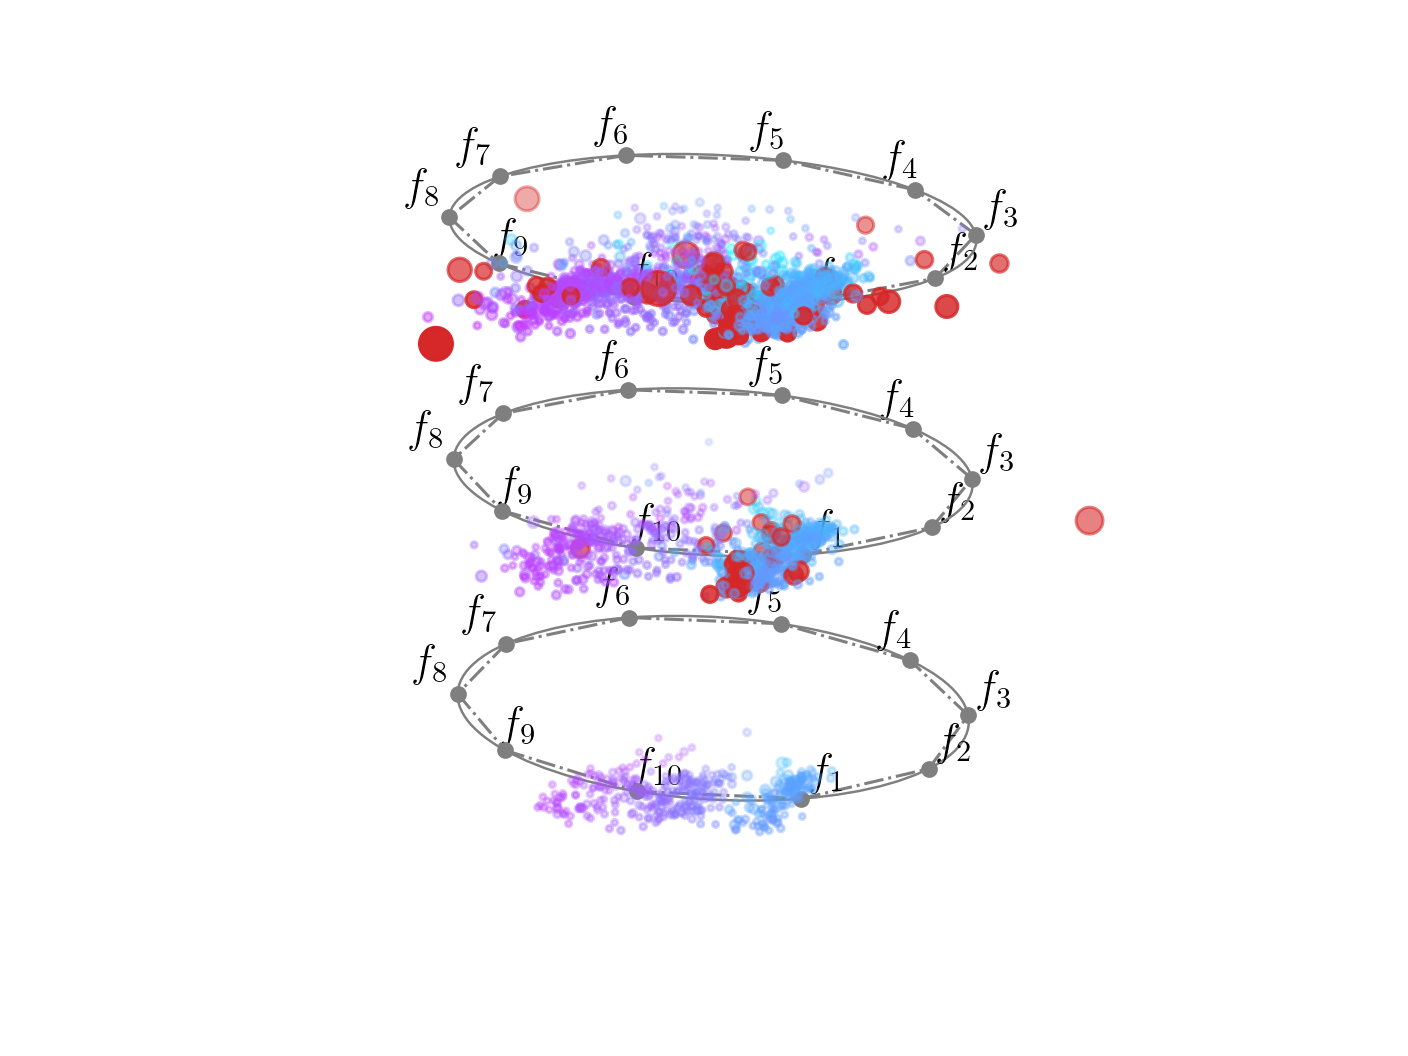

Plotting palette-star-viz.
Loading depth contours from ../../data/gaa/10d/depth-cont-cvhull.csv.


In [6]:
%matplotlib notebook
sys.path.append('../../')
from vis.plotting import paletteviz
from vis.plotting.paletteviz import camera_angles_star

pf,dim = 'gaa', '10d'

fullpathf = "../../data/{0:s}/{1:s}/dataf.csv".format(pf, dim)
if os.path.exists(fullpathf):
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]

    # load the front
    F = np.loadtxt(fullpathf, delimiter=',')
    print(fullpathf, F.shape, dirs, frontname)

    CV, Mu, Ik = load_props(path)
    S,C,_ = decide_size_color(CV, Mu, Ik)

    pdffigpath = os.path.join(path, "palette-starviz.pdf")
    svgfigpath = os.path.join(path, "palette-starviz.svg")
    depth_contour_path = os.path.join(path, "depth-cont-cvhull.csv")
    with plt.rc_context({"text.usetex": True, "font.size": 12}):
        ax,P = paletteviz.plot(F, ax=Axes3D(plt.figure()), depth_contours=depth_contour_path, mode='star', \
                        n_partitions=4, s=S, c=C, verbose=True, euler=(-15,20)) 
        #camera_angles_star[pf][dim])

        # try to remove white space as much as possible
        plt.subplots_adjust(top=0.01, bottom=0, right=0.01, left=0, hspace=0, wspace=0)
        plt.margins(0,0,0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.gca().zaxis.set_major_locator(plt.NullLocator())

        # save the fig
        plt.savefig(pdffigpath, bbox_inches='tight', dpi=150, pad_inches=0)
        plt.savefig(svgfigpath, bbox_inches='tight', dpi=150, pad_inches=0, format='svg')

        # show
        plt.show()

### Find three outlier points

In [44]:
muidpath = os.path.join(path, "muid.csv")
muid = np.loadtxt(muidpath, delimiter=',', dtype=int)
print("muid =", muid)
print("P[muid][0:5] =", P[muid][0:5])

l1c = [0.00,0.00,1.00] # center of L1
l2c = [0.00,0.00,0.75] # center of L2
l3c = [0.00,0.00,0.50] # center of L3

# outlier 1 in layer 1
i = (0.99 <= P[muid,2]) & (P[muid,2] < 1.01)
print("muid[i] =", muid[i])
print("P[muid[i]][0:5] =", P[muid[i]][0:5])

Dc = np.linalg.norm(P[muid[i]] - l1c, axis=1)
print("Dc[0:5] =", Dc[0:5])

Dm = np.column_stack((Dc, muid[i])).astype(object)
Dmu = Dm[Dm[:,0].argsort()][::-1][:,1].astype(int)
print("Dmu[0:5] =", Dmu[0:5])

p1 = Dmu[0]
print("p1 =", p1, "F[p1] =", F[p1])

# outlier 2 in layer 1
i = (0.99 <= P[muid,2]) & (P[muid,2] < 1.01) \
        & (-1.0 < P[muid,1]) & (P[muid,1] < -0.5) \
        & (-0.5 < P[muid,0]) & (P[muid,0] < -0.25)
print("muid[i] =", muid[i])
print("P[muid[i]][0:5] =", P[muid[i]][0:5])

Dc = np.linalg.norm(P[muid[i]] - l1c, axis=1)
print("Dc[0:5] =", Dc[0:5])

Dm = np.column_stack((Dc, muid[i])).astype(object)
Dmu = Dm[Dm[:,0].argsort()][::-1][:,1].astype(int)
print("Dmu[0:5] =", Dmu[0:5])

p2 = Dmu[0]
print("p2 =", p2, "F[p2] =", F[p2])

# outlier in layer 2
i = (0.74 <= P[muid,2]) & (P[muid,2] < 0.76)
print("muid[i] =", muid[i])
print("P[muid[i]][0:5] =", P[muid[i]][0:5])

Dc = np.linalg.norm(P[muid[i]] - l2c, axis=1)
print("Dc[0:5] =", Dc[0:5])

p3 = muid[i][np.argmax(Dc)]
print("p3 =", p3, "F[p3] =", F[p3])

muid = [   0    4   17   26   59   62  101  131  150  151  196  237  245  266
  280  313  334  350  382  392  412  475  504  509  519  572  596  616
  630  645  649  680  700  723  731  770  784  785  788  851  877  914
  929  939  948  977 1054 1094 1098 1114 1166 1176 1177 1189 1213 1222
 1225 1249 1256 1278 1309 1354 1387 1397 1398 1420 1470 1489 1511 1544
 1560 1564 1599 1657 1783 1784 1790 1816 1899 1901 1903 1933 1972 1982
 2006 2008 2023 2038 2042 2046 2051 2078 2127 2158 2196 2199 2249 2296
 2368 2371 2406 2428 2499 2523 2530 2532 2563 2569 2577 2617 2676 2692
 2694 2723 2731 2777 2780 2803 2807 2837 2862 2873 2890 2896 2938 3005
 3009 3016 3033]
P[muid][0:5] = [[ 0.72245353 -0.02053411  0.75      ]
 [ 1.25399144 -0.36772112  1.        ]
 [ 0.1059512   0.58442153  1.        ]
 [ 0.71576333 -0.20919122  0.75      ]
 [ 1.34770494 -0.37804671  0.75      ]]
muid[i] = [   4   17   62  101  151  196  237  266  334  350  382  392  475  504
  509  519  616  630  680  700  723  731  784

../../data/gaa/10d/dataf.csv (3112, 10) ['..', '..', 'data', 'gaa', '10d'] gaa


<IPython.core.display.Javascript object>


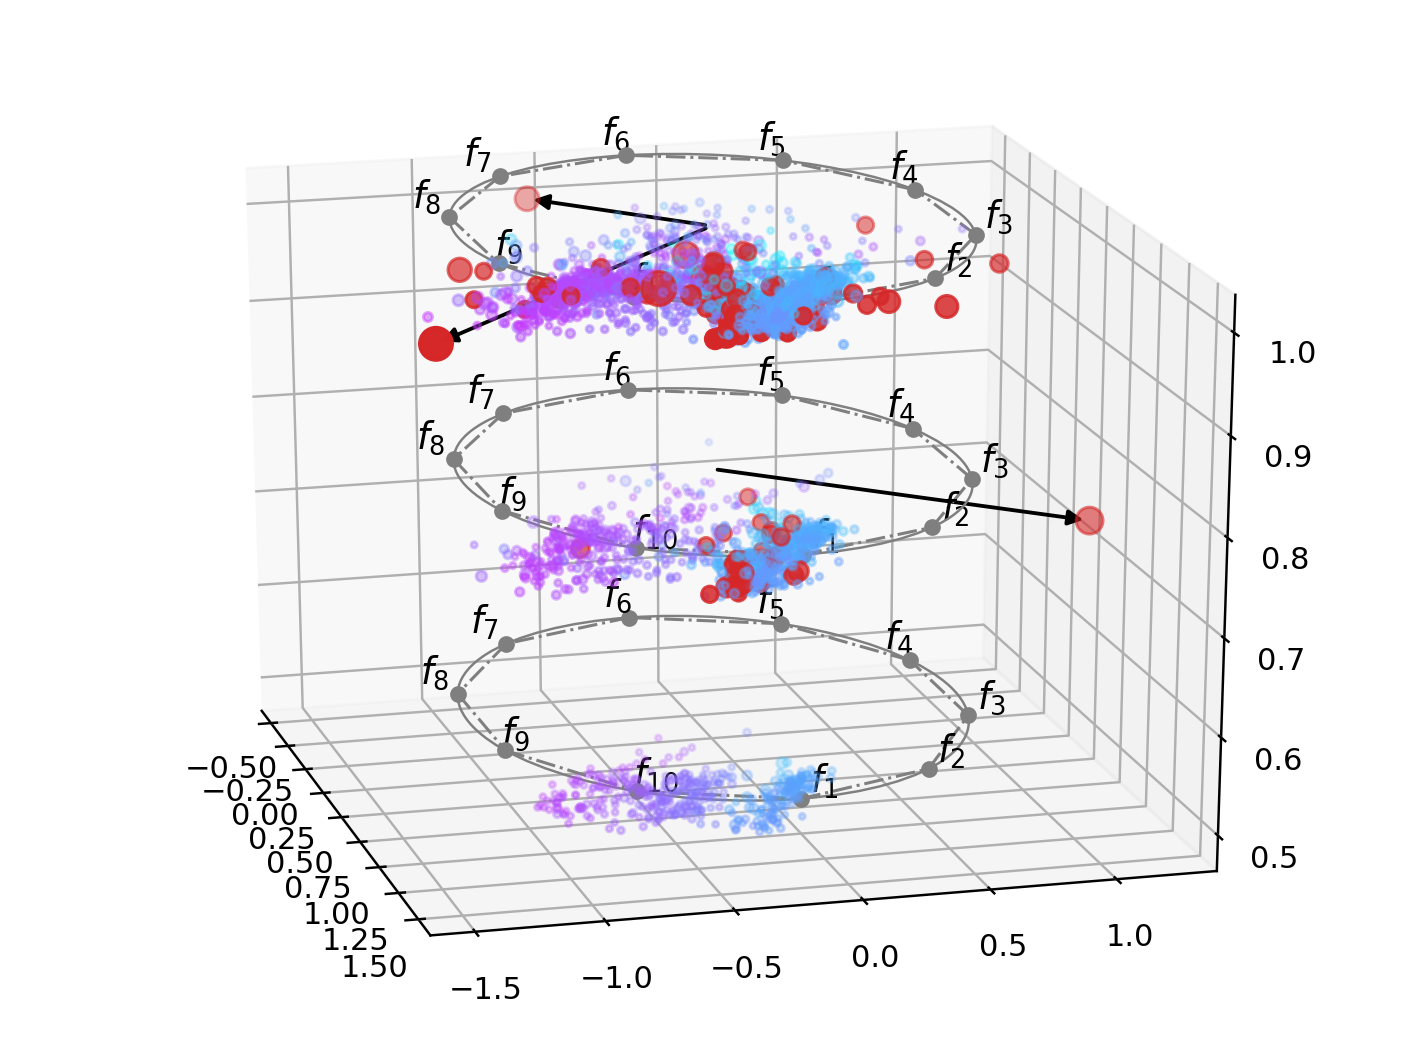

Plotting palette-star-viz.
Loading depth contours from ../../data/gaa/10d/depth-cont-cvhull.csv.


In [43]:
%matplotlib notebook
sys.path.append('../../')
from vis.plotting import paletteviz
from vis.plotting.paletteviz import camera_angles_star
from vis.plotting.utils import default_color, enhance_color, Arrow3D

pf,dim = 'gaa', '10d'

fullpathf = "../../data/{0:s}/{1:s}/dataf.csv".format(pf, dim)
if os.path.exists(fullpathf):
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]

    # load the front
    F = np.loadtxt(fullpathf, delimiter=',')
    print(fullpathf, F.shape, dirs, frontname)

    CV, Mu, Ik = load_props(path)
    S,C,_ = decide_size_color(CV, Mu, Ik)

    pdffigpath = os.path.join(path, "palette-starviz.pdf")
    svgfigpath = os.path.join(path, "palette-starviz.svg")
    depth_contour_path = os.path.join(path, "depth-cont-cvhull.csv")
    # with plt.rc_context({"text.usetex": True, "font.size": 12}):
    ax,P = paletteviz.plot(F, ax=Axes3D(plt.figure()), depth_contours=depth_contour_path, mode='star', \
                    n_partitions=4, s=S, c=C, verbose=True, euler=(-15,20), draw_axes=True) 

    # draw arrows
    a = Arrow3D(\
            [l1c[0], P[p1,0]], \
            [l1c[1], P[p1,1]], \
            [l1c[2], P[p1,2]], \
            mutation_scale = 10, lw = 1.25, \
            arrowstyle = "-|>", color = 'black')
    ax.add_artist(a)
    #
    a = Arrow3D(\
            [l1c[0], P[p2,0]], \
            [l1c[1], P[p2,1]], \
            [l1c[2], P[p2,2]], \
            mutation_scale = 10, lw = 1.25, \
            arrowstyle = "-|>", color = 'black')
    ax.add_artist(a)
    #
    a = Arrow3D(\
            [l2c[0], P[p3,0]], \
            [l2c[1], P[p3,1]], \
            [l2c[2], P[p3,2]], \
            mutation_scale = 10, lw = 1.25, \
            arrowstyle = "-|>", color = 'black')
    ax.add_artist(a)

    # try to remove white space as much as possible
#     plt.subplots_adjust(top=0.01, bottom=0, right=0.01, left=0, hspace=0, wspace=0)
#     plt.margins(0,0,0)
#     plt.gca().xaxis.set_major_locator(plt.NullLocator())
#     plt.gca().yaxis.set_major_locator(plt.NullLocator())
#     plt.gca().zaxis.set_major_locator(plt.NullLocator())

    # save the fig
    plt.savefig(pdffigpath, bbox_inches='tight', dpi=150, pad_inches=0)
    plt.savefig(svgfigpath, bbox_inches='tight', dpi=150, pad_inches=0, format='svg')

    # show
    plt.show()